In [6]:
!pip install yfinance


In [7]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-12-31'
data = yf.download(ticker, start=start_date, end=end_date)

data.to_csv('apple_daily.csv')

weekly_data = data.resample('W').last()
weekly_data.to_csv('apple_weekly.csv')

biweekly_data = data.resample('2W').last()
biweekly_data.to_csv('apple_biweekly.csv')


[*********************100%***********************]  1 of 1 completed


In [8]:
import pandas as pd 

df = pd.read_csv("apple_daily.csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,123.63251495361328,129.39550245721088,122.74285754273936,128.78263321771394,112117500
3,2023-01-04,124.90769958496094,127.18126787275598,123.64241229292817,125.4316068972832,89113600
4,2023-01-05,123.58309173583984,126.30148488412831,123.32608545003059,125.66884126386319,80962700


In [9]:
!pip install numpy

In [10]:
!pip install tensorflow

[*********************100%***********************]  1 of 1 completed

Fetching stock data for AAPL (2023-2025)...


Profit from $100,000 investment: $100312.41
Loss saved by following prediction: $17720.79


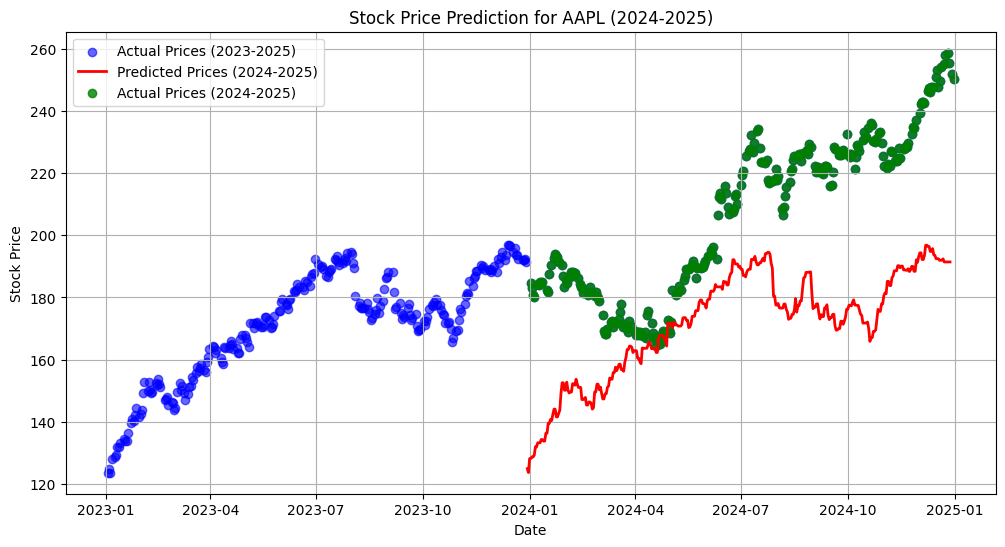

In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")

# Get user input for company ticker
def get_user_input():
    ticker = input("Enter the company ticker symbol (e.g., AAPL for Apple): ").strip().upper()
    return ticker

# Fetch stock data
def fetch_stock_data(ticker):
    print(f"Fetching stock data for {ticker} (2023-2025)...")
    data = yf.download(ticker, start="2023-01-01", end="2025-01-01")
    data.index = pd.to_datetime(data.index)
    return data[['Close']]

# Prepare data
def prepare_data(stock_data):
    stock_data = stock_data.sort_index()
    train_data = stock_data.loc[(stock_data.index >= '2023-01-01') & (stock_data.index < '2024-01-01')].reset_index()
    train_data['Days'] = (train_data['Date'] - train_data['Date'].min()).dt.days
    return train_data[['Days']].values, train_data['Close'].values

# Train Gradient Boosting model
def train_model(X, y):
    model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
    model.fit(X, y)
    return model

# Predict future prices
def predict_future(model, last_date):
    future_dates = [last_date + timedelta(days=i) for i in range(1, 366)]
    future_days = np.array([(date - last_date).days for date in future_dates]).reshape(-1, 1)
    predictions = model.predict(future_days)
    return future_dates, predictions

# Calculate profit from $100,000 investment
def calculate_profit(predictions, actual_future):
    initial_investment = 100000
    initial_price = float(predictions[0])
    final_price = float(actual_future['Close'].iloc[-1])
    shares_purchased = initial_investment / initial_price
    final_value = shares_purchased * final_price
    profit = final_value - initial_investment
    print(f"Profit from $100,000 investment: ${profit:.2f}")
    return profit

# NEW: Calculate loss saved by following predictions
def calculate_loss_saved(predictions, actual_future):
    initial_investment = 100000
    actual_start_price = float(actual_future['Close'].iloc[0])
    actual_end_price = float(actual_future['Close'].iloc[-1])
    actual_loss = initial_investment * (1 - actual_end_price / actual_start_price)
    predicted_loss = initial_investment * (1 - float(predictions[-1]) / float(predictions[0]))
    loss_saved = actual_loss - predicted_loss
    print(f"Loss saved by following prediction: ${loss_saved:.2f}")
    return loss_saved

# Main function
ticker = get_user_input()
stock_data = fetch_stock_data(ticker)

if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
    stock_data.index = pd.to_datetime(stock_data.index)

X, y = prepare_data(stock_data)
model = train_model(X, y)

closest_date = stock_data.index.asof(pd.Timestamp('2024-01-01'))
last_date = closest_date
    
future_dates, predictions = predict_future(model, last_date)
actual_future = stock_data.loc[(stock_data.index >= '2024-01-01') & (stock_data.index <= '2025-01-01')]

# Calculate profit and loss saved
calculate_profit(predictions, actual_future)
calculate_loss_saved(predictions, actual_future)

plt.figure(figsize=(12, 6))
plt.scatter(stock_data.index, stock_data['Close'], label="Actual Prices (2023-2025)", color='blue', alpha=0.6)
plt.plot(future_dates, predictions, label="Predicted Prices (2024-2025)", color='red', linewidth=2)
plt.scatter(actual_future.index, actual_future['Close'], label="Actual Prices (2024-2025)", color='green', alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {ticker} (2024-2025)")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
%%capture
!pip install ripser

In [46]:
!pip install ripser

In [ ]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from ripser import Rips
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")

# Get user input for company ticker
def get_user_input():
    ticker = input("Enter the company ticker symbol (e.g., AAPL for Apple): ").strip().upper()
    return ticker

# Fetch stock data
def fetch_stock_data(ticker):
    print(f"Fetching stock data for {ticker} (2023-2025)...")
    data = yf.download(ticker, start="2023-01-01", end="2025-01-01")
    data.index = pd.to_datetime(data.index)
    return data[['Close']]

# Perform Takens Embedding (time-delay embedding)
def takens_embedding(series, delay=5, dimension=3):
    embedded = np.array([
        series[i : i + dimension]
        for i in range(len(series) - dimension * delay)
    ])
    return embedded

# Compute Persistent Homology features
def persistent_homology_features(embedded_series):
    rips = Rips(maxdim=1, verbose=False)
    diagrams = rips.fit_transform(embedded_series)
    
    # Get H0 (connected components) and H1 (loops) summaries
    h0 = diagrams[0]
    h1 = diagrams[1] if len(diagrams) > 1 else np.array([])
    
    # Persistence features
    h0_persistence = np.sum(h0[:, 1] - h0[:, 0]) if h0.size > 0 else 0
    h1_persistence = np.sum(h1[:, 1] - h1[:, 0]) if h1.size > 0 else 0
    
    return h0_persistence, h1_persistence

# Prepare data with Topological Features
def prepare_data_with_topology(stock_data):
    stock_data = stock_data.reset_index()
    stock_data = stock_data.sort_values('Date')
    
    train_data = stock_data.loc[
        (stock_data['Date'] >= '2023-01-01') & (stock_data['Date'] < '2024-01-01')
    ]
    
    # Takens Embedding on closing prices
    embedded = takens_embedding(train_data['Close'].values)
    
    # Compute Persistent Homology Features
    h0, h1 = persistent_homology_features(embedded)
    
    # Create Days Feature
    train_data['Days'] = (train_data['Date'] - train_data['Date'].min()).dt.days
    
    # Combine Features
    X = np.column_stack([
        train_data['Days'].values[:len(embedded)],  # Time feature
        embedded.mean(axis=1),                      # Embedded mean
        embedded.std(axis=1),                       # Embedded std
        np.full(len(embedded), h0),                # H0 Persistence
        np.full(len(embedded), h1)                 # H1 Persistence
    ])
    
    y = train_data['Close'].values[:len(embedded)]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

# Train Gradient Boosting model
def train_model(X, y):
    model = GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    )
    model.fit(X, y)
    return model

# Predict future prices
def predict_future(model, last_date):
    future_dates = [last_date + timedelta(days=i) for i in range(1, 366)]
    future_days = np.array([(date - last_date).days for date in future_dates]).reshape(-1, 1)
    
    # Create placeholder topological features for prediction
    future_topology = np.zeros((len(future_days), 4))  
    
    future_features = np.hstack([future_days, future_topology])
    predictions = model.predict(future_features)
    return future_dates, predictions

# Calculate profit from $100,000 investment
def calculate_profit(predictions, actual_future):
    initial_investment = 100000
    initial_price = float(predictions[0])
    final_price = float(actual_future['Close'].iloc[-1])
    shares_purchased = initial_investment / initial_price
    final_value = shares_purchased * final_price
    profit = final_value - initial_investment
    print(f"Profit from $100,000 investment: ${profit:.2f}")
    return profit

# Calculate loss saved by following predictions
def calculate_loss_saved(predictions, actual_future):
    initial_investment = 100000
    actual_start_price = float(actual_future['Close'].iloc[0])
    actual_end_price = float(actual_future['Close'].iloc[-1])
    actual_loss = initial_investment * (1 - actual_end_price / actual_start_price)
    predicted_loss = initial_investment * (1 - float(predictions[-1]) / float(predictions[0]))
    loss_saved = actual_loss - predicted_loss
    print(f"Loss saved by following prediction: ${loss_saved:.2f}")
    return loss_saved

# Main function
ticker = get_user_input()
stock_data = fetch_stock_data(ticker)

X, y = prepare_data_with_topology(stock_data)
model = train_model(X, y)

closest_date = stock_data.index.asof(pd.Timestamp('2024-01-01'))
last_date = closest_date

future_dates, predictions = predict_future(model, last_date)
actual_future = stock_data.loc[
    (stock_data.index >= '2024-01-01') & (stock_data.index <= '2025-01-01')
]

# Calculate profit and loss saved
calculate_profit(predictions, actual_future)
calculate_loss_saved(predictions, actual_future)

# Plot predictions and actual prices
plt.figure(figsize=(12, 6))
plt.scatter(
    stock_data.index,
    stock_data['Close'],
    label="Actual Prices (2023-2025)",
    color='blue',
    alpha=0.6
)
plt.plot(
    future_dates,
    predictions,
    label="Predicted Prices (2024-2025)",
    color='red',
    linewidth=2
)
plt.scatter(
    actual_future.index,
    actual_future['Close'],
    label="Actual Prices (2024-2025)",
    color='green',
    alpha=0.8
)
plt.axvline(x=datetime(2024, 1, 1), color='purple', linestyle='--', label='Prediction Start (2024)')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{ticker} Stock Price Prediction with Topological Features (2024-2025)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'ripser'